In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

[ 7373 32197 39484 53691  9450 33911  2923 44226 32631 37468 42741 18331
 53758 47133 23782 37474]


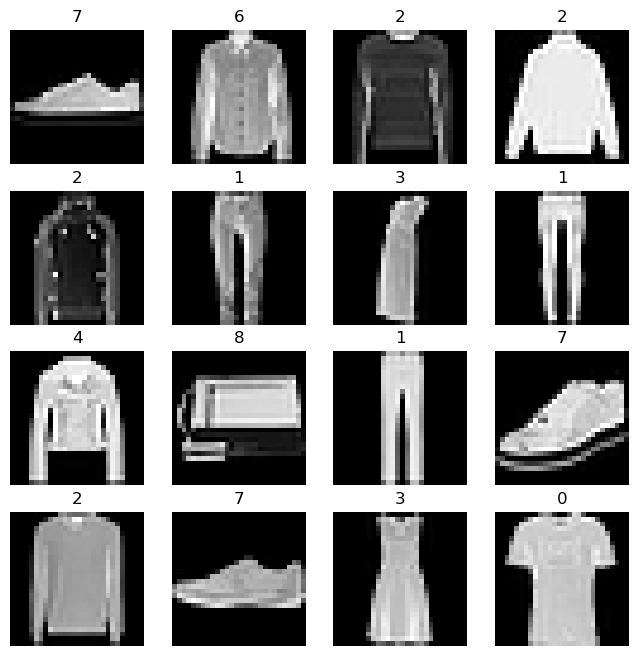

In [8]:
samples = np.random.randint(60000, size = 16)
print(samples)

plt.figure(figsize = (8, 8))    # size는 inch
for i, idx in enumerate(samples):
    plt.subplot(4, 4, i+1)      # matplotlib의 첫번째는 1
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(y_train[idx])
plt.show()

### Split Validation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)
(42000,) (18000,) (10000,)


### Normalization

In [10]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [12]:
np.max(X_train_s), np.min(X_train_s)

(1.0, 0.0)

### One Hot Encoding

In [13]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

print(y_train_o[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Flatten

In [14]:
X_train_s = X_train_s.reshape(-1, 28*28)
X_val_s = X_val_s.reshape(-1, 28*28)

print(X_train_s.shape, X_val_s.shape)

(42000, 784) (18000, 784)


### Model

In [15]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units = 64, activation = 'relu', input_shape = (28*28, )),     # input은 image size
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation='softmax')    # 출력 class가 10   
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/30


657/657 [==============================] - 2s 2ms/step - loss: 0.6675 - accuracy: 0.7708 - val_loss: 0.4740 - val_accuracy: 0.8295
Epoch 2/30
657/657 [==============================] - 1s 1ms/step - loss: 0.4322 - accuracy: 0.8439 - val_loss: 0.4121 - val_accuracy: 0.8532
Epoch 3/30
657/657 [==============================] - 1s 1ms/step - loss: 0.3864 - accuracy: 0.8617 - val_loss: 0.3760 - val_accuracy: 0.8652
Epoch 4/30
657/657 [==============================] - 1s 1ms/step - loss: 0.3603 - accuracy: 0.8689 - val_loss: 0.3690 - val_accuracy: 0.8692
Epoch 5/30
657/657 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.8748 - val_loss: 0.3550 - val_accuracy: 0.8717
Epoch 6/30
657/657 [==============================] - 1s 1ms/step - loss: 0.3206 - accuracy: 0.8823 - val_loss: 0.3485 - val_accuracy: 0.8747
Epoch 7/30
657/657 [==============================] - 1s 1ms/step - loss: 0.3105 - accuracy: 0.8840 - val_loss: 0.3446 - val_accuracy: 0.8748
Epoc

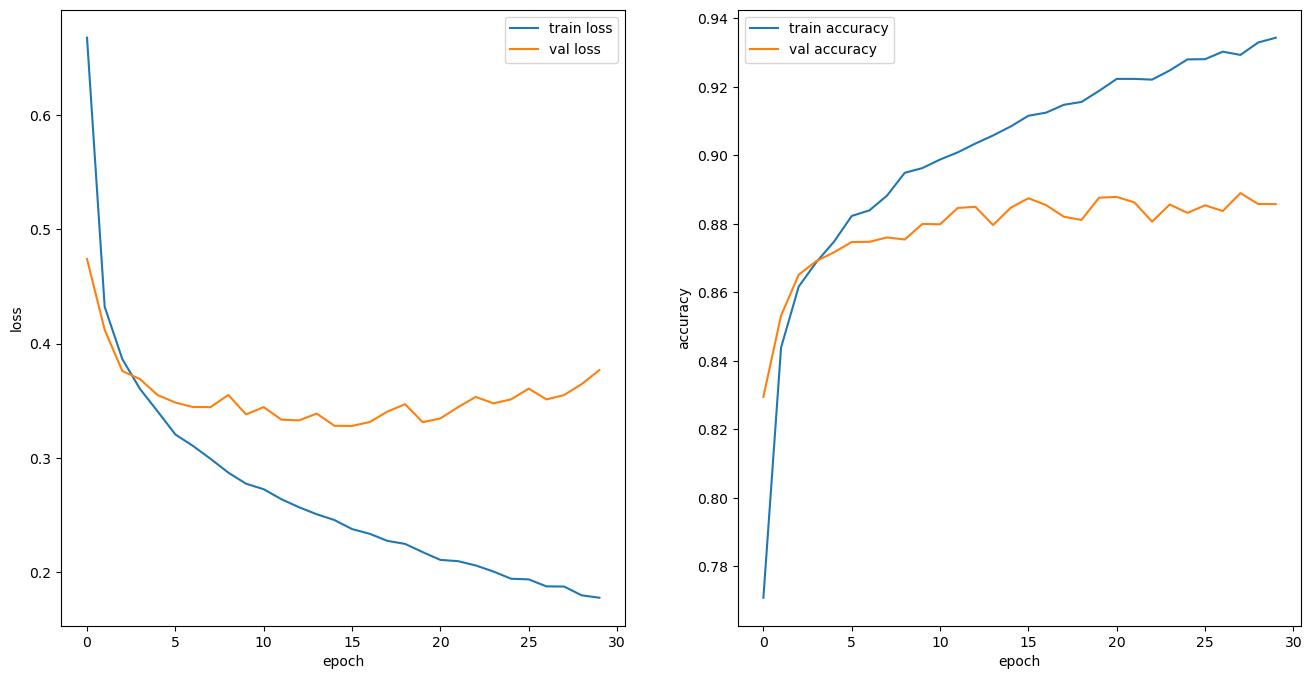

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()

    plt.show()

plot_history(history)

### Eval

In [20]:
X_test_s = X_test.astype('float32')/255.
y_test_o = to_categorical(y_test)

In [21]:
y_test_o

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
print(X_test_s.shape)
X_test_s = X_test_s.reshape(-1, 28*28)
print(X_test_s.shape)

(10000, 28, 28)
(10000, 784)


In [23]:
y_pred = model.predict(X_test_s)
y_pred[:5]

313/313 [==============================] - 0s 699us/step


array([[5.7738468e-08, 2.1588829e-12, 8.2881740e-10, 1.7393423e-13,
        1.8479116e-16, 1.5105805e-07, 1.8783516e-12, 1.3627729e-04,
        9.0634427e-12, 9.9986362e-01],
       [1.9828174e-06, 1.5242543e-09, 9.9621648e-01, 2.1089082e-09,
        3.7612147e-03, 2.9311537e-28, 2.0303374e-05, 4.3239200e-22,
        5.9052727e-15, 1.0762099e-15],
       [7.1870008e-09, 9.9999988e-01, 3.2310382e-08, 7.4086869e-11,
        1.2889306e-07, 1.7399168e-14, 1.9060444e-09, 7.5598528e-19,
        6.6223446e-15, 3.2791441e-14],
       [1.5445191e-09, 1.0000000e+00, 6.1437050e-11, 1.5802051e-10,
        2.2951342e-08, 5.4359726e-16, 9.7409129e-11, 1.0406136e-22,
        4.9388506e-17, 7.2198061e-18],
       [2.7297113e-02, 3.6147623e-09, 1.8808708e-02, 2.9442473e-03,
        5.5027013e-03, 3.6877237e-09, 9.4542962e-01, 6.7126682e-10,
        1.7528761e-05, 9.1018748e-09]], dtype=float32)

In [24]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0],
      dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, y_pred_max))
print(f1_score(y_test, y_pred_max, average='macro'))

0.874
0.8738756144586448
